Daniel Rocha Ruiz, MSc in Data Science and Business Analytics

# Introduction
## Summary
- This notebook is a cookbook for a few basic regression types with the **Scikit-Learn** package.
- We will go through the most fundamental steps of model development, but our goal is really to demo the package.
- We will run Univariate and Multivariate Linear Regressions, exploring the famous `diabetes` dataset.
- We will also run Binary and Multinomial Logistic Regression, exploring the also famous `digits` dataset.

## Sources
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression
- https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
- https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

# Regressions
## Set-up
### Import packages
In this section we import the **Scikit-Learn** packages, as well as a few other general packages.

In [1]:
# genereal packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# scikit-learn packages
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split 

### Load and prepare the data

In [2]:
# Load the dataset
# Sklearn has a few built-in datasets. This dataset analyses the evolution of diabetes in a set of patients.
dataset = datasets.load_diabetes()

# Description
print("Dataset columns:", dataset.keys())
print("Dataset feature mames:", dataset.feature_names)
print("Dataset data dimension:", dataset.data.shape)
print(dataset.DESCR)
# all data is normalized (mean centered and scaled by the standard deviation times n_samples)

Dataset columns: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Dataset feature mames: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Dataset data dimension: (442, 10)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - 

In [3]:
# Univariate regression -> We use only one feature
# Y = Quantitative measure of disease progression one year after baseline
# X = Body Mass Index (Normalized)

dataset_X = dataset.data[:, np.newaxis, 2]
dataset_y = dataset.target
print("Univariate X:", dataset_X.shape)

# We divide our dataset into training/testing sets

dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_X, dataset_y, test_size=0.2, random_state=0)
print("Training set dimension (X):", dataset_X_train.shape)
print("Test set dimension (X):", dataset_X_test.shape)
print("Training set dimension (Y):", dataset_y_train.shape)
print("Test set dimension (Y):", dataset_y_test.shape)

Univariate X: (442, 1)
Training set dimension (X): (353, 1)
Test set dimension (X): (89, 1)
Training set dimension (Y): (353,)
Test set dimension (Y): (89,)


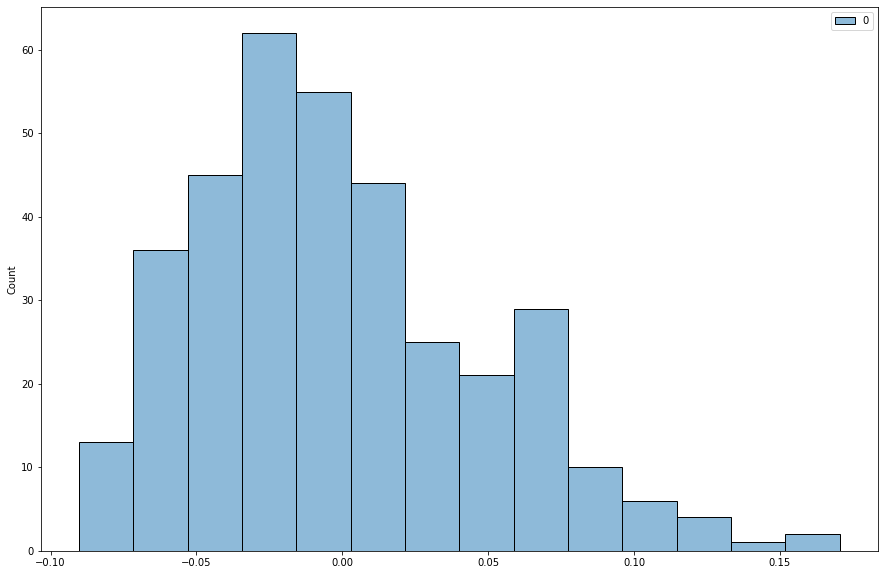

In [4]:
# Visualizing the training set
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.histplot(dataset_X_train)

plt.show()

## Univariate Linear Regression
### Train the model

Here, we go through the basic steps of running an univariate linear regression, including:
- Model training
- Model performance
- Visualization.

In [5]:
# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(dataset_X_train, dataset_y_train)

# Make predictions using the testing set
dataset_y_pred = regr.predict(dataset_X_test)

# The coefficients
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)

Intercept: 152.28824927379625
Coefficients: [981.65543614]


### Analyse the results

In [6]:
# Quality metrics
# The mean squared error
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(dataset_y_test, dataset_y_pred)))
print("Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)))
print("Root Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)**0.5))
# Explained variance score (1 is perfect prediction)
print("R-Square: {:.2f}".format(r2_score(dataset_y_test, dataset_y_pred)))

Mean Absolute Error: 52.94
Mean Squared Error: 4150.68
Root Mean Squared Error: 64.43
R-Square: 0.19


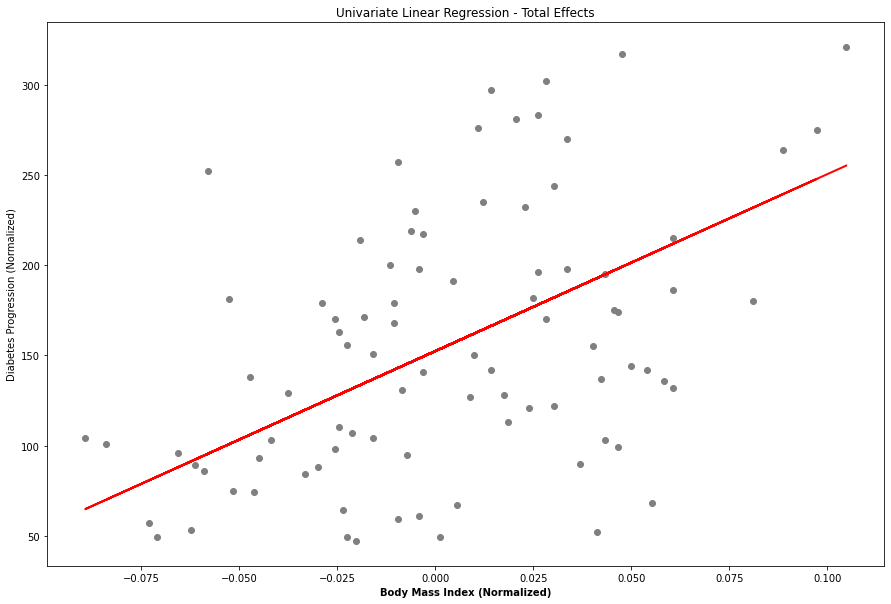

In [7]:
# Plot outputs
dataset_X_plot = dataset_X_test
dataset_y_plot = dataset_y_test

plt.figure(figsize=(15,10))
plt.tight_layout()
plt.scatter(dataset_X_plot, dataset_y_plot,  color='gray')
plt.plot(dataset_X_plot, dataset_y_pred, color='red', linewidth=2)
plt.title("Univariate Linear Regression - Total Effects")
plt.xlabel("Body Mass Index (Normalized)",fontweight="bold")
plt.ylabel("Diabetes Progression (Normalized)")
plt.show()

## Multivariate Linear Regression
### Train the model

In [8]:
# Multivariate Regression -> We use all features available
# The same steps as in the univariate regression
dataset_X = dataset.data
dataset_y = dataset.target
print("Multivariate X:", dataset_X.shape)
dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_X, dataset_y, test_size=0.2, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(dataset_X_train, dataset_y_train)
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)
dataset_y_pred = regr.predict(dataset_X_test)

Multivariate X: (442, 10)
Intercept: 152.53813351954062
Coefficients: [ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]


### Analyse the results

In [9]:
# Quality metrics
# The mean squared error
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(dataset_y_test, dataset_y_pred)))
print("Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)))
print("Root Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)**0.5))
# Explained variance score (1 is perfect prediction)
print("R-Square: {:.2f}".format(r2_score(dataset_y_test, dataset_y_pred)))

Mean Absolute Error: 46.17
Mean Squared Error: 3424.32
Root Mean Squared Error: 58.52
R-Square: 0.33


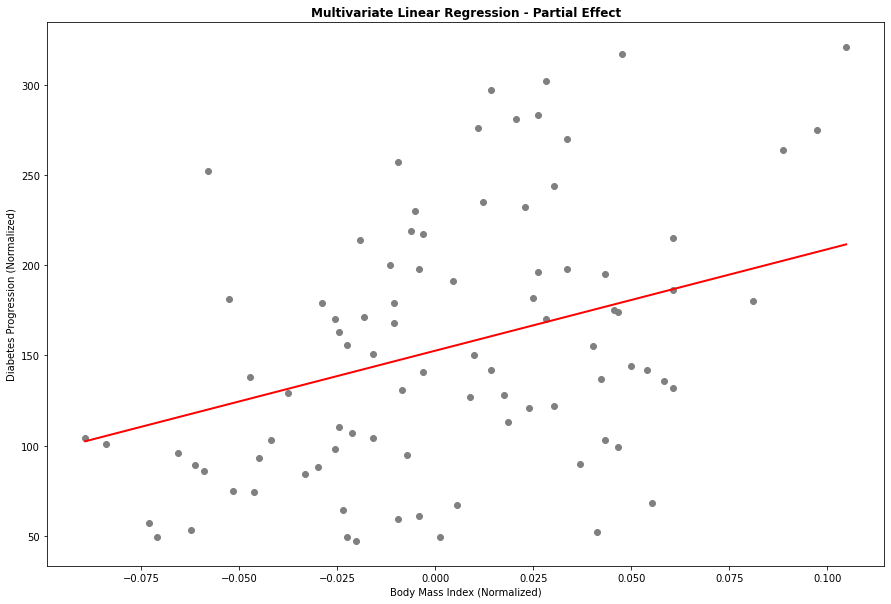

In [10]:
# Plot outputs
dataset_X_plot = dataset_X_test[:,2]
dataset_y_plot = dataset_y_test

plt.figure(figsize=(15,10))
plt.tight_layout()
plt.scatter(dataset_X_plot, dataset_y_plot,  color='gray')
sup = np.linspace(dataset_X_plot.min(),dataset_X_plot.max(),len(dataset_y_plot))
plt.plot(sup, [regr.intercept_ + i*regr.coef_[2] for i in sup], color='red', linewidth=2)
plt.title("Multivariate Linear Regression - Partial Effect",fontweight="bold")
plt.xlabel("Body Mass Index (Normalized)")
plt.ylabel("Diabetes Progression (Normalized)")
plt.show()

# Classifiers
## Import packages
The packages have already been imported above.

## Set-up
### Load and prepare the data

In [11]:
# Load the dataset
# Sklearn has a few built-in datasets. This dataset has images of hand-written numbers.
dataset = datasets.load_digits()

# Description
print("Dataset columns:", dataset.keys())
print("Dataset target mames:", dataset.target_names)
print("Dataset data dimension:", dataset.data.shape)
print(dataset.DESCR)
# all data is normalized (mean centered and scaled by the standard deviation times n_samples)

Dataset columns: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Dataset target mames: [0 1 2 3 4 5 6 7 8 9]
Dataset data dimension: (1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 p

## Binary Logistic Regression
THe binary logistic regression essentially asks a yes-or-no question. As we have 10 digits (0,1,2,...,9), we will ask "Is this the number 5?".
### Train the model

In [12]:
# Logistic Regression -> We use all features available
# Binomial: We create two y categories
dataset_X = dataset.data
dataset_y = (dataset.target==5).astype(int)
print("Multivariate X:", dataset_X.shape)
dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_X, dataset_y, test_size=0.20, random_state=0)
regr = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',C=1e8)
regr.fit(dataset_X_train, dataset_y_train)
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)
dataset_y_pred = regr.predict(dataset_X_test)

Multivariate X: (1797, 64)
Intercept: [-0.10845621]
Coefficients: [[ 0.00000000e+00  2.30605487e-01  1.62319660e+00 -1.23944222e+00
  -2.71116218e-01  1.20821251e+00  1.71750400e+00 -4.86720154e-01
   2.76490722e-03  1.54442346e-01  6.10667789e-01  2.90553360e-01
   4.15733801e-01 -5.27361318e-01 -8.56664213e-01 -2.84424870e-01
  -9.24155971e-04 -2.82510753e-01  1.08411168e+00  4.40116442e-01
  -1.64773488e+00 -2.56225404e+00 -2.62195409e+00 -6.48575698e-02
  -1.65628601e-02  1.08726279e-01  1.01079752e+00 -7.99810085e-01
   1.46692011e+00  9.53815618e-02 -2.40577751e+00 -5.35792922e-04
   0.00000000e+00 -9.87980224e-01  3.36340105e-01 -5.62975255e-01
  -3.98904616e-01 -4.83396019e-01 -5.03342831e-02  0.00000000e+00
  -9.30830792e-04 -8.62592831e-01 -7.19235964e-01 -1.06924342e+00
  -6.05802526e-01  3.77972073e-01  1.13813338e-01 -3.45409732e-03
  -3.98118050e-04  3.98961635e-01 -5.90205046e-01  1.10117539e-01
  -3.67263899e-01 -3.77027149e-01 -5.47455201e-01 -8.64104771e-02
  -2.24320

### Analyse the results

In [13]:
# Quality metrics
print("Score: {:.2f}".format(regr.score(dataset_X_test, dataset_y_test)))
# The mean squared error
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(dataset_y_test, dataset_y_pred)))
print("Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)))
print("Root Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)**0.5))
# Explained variance score (1 is perfect prediction)
print("R-Square: {:.2f}".format(r2_score(dataset_y_test, dataset_y_pred)))

Score: 0.99
Mean Absolute Error: 0.01
Mean Squared Error: 0.01
Root Mean Squared Error: 0.11
R-Square: 0.89


AUC: 0.961


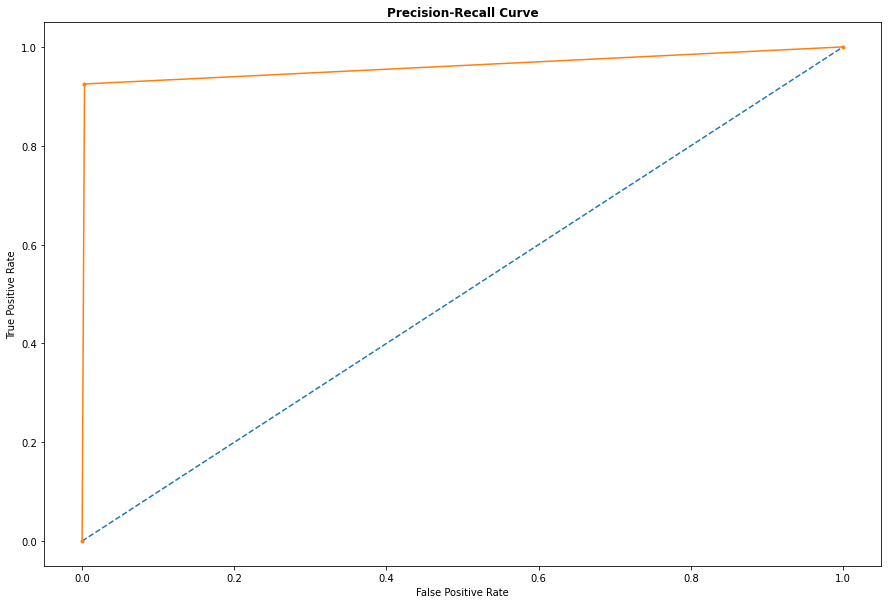

In [14]:
auc = roc_auc_score(dataset_y_test, dataset_y_pred)
print("AUC: {:.3f}".format(auc))

# Plot the precision-recall curve for the model
fpr, tpr, thresholds = roc_curve(dataset_y_test, dataset_y_pred)

plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("Precision-Recall Curve",fontweight="bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Multinomial Logistic Regression
In the multinomial logistic regression will predict which digit is in the image.
### Train the model

In [15]:
# Logistic Regression -> We use all features available
# Multinomial: We take all y categories
dataset_X = dataset.data
dataset_y = dataset.target
print("Multivariate X:", dataset_X.shape)
dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_X, dataset_y, test_size=0.20, random_state=42)
regr = linear_model.LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', C=1e8)
regr.fit(dataset_X_train, dataset_y_train)
print("Intercept:", regr.intercept_)
#print("Coefficients:", regr.coef_)
dataset_y_pred = regr.predict(dataset_X_test)

Multivariate X: (1797, 64)
Intercept: [-0.00511108 -0.22981233 -0.00313806  0.05427101  0.19351273 -0.04951947
 -0.04117948  0.0320535   0.11444697 -0.06552377]


### Analyse the results

In [16]:
# Quality metrics
print("Score: {:.2f}".format(regr.score(dataset_X_test, dataset_y_test)))
# The mean squared error
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(dataset_y_test, dataset_y_pred)))
print("Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)))
print("Root Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)**0.5))
# Explained variance score (1 is perfect prediction)
print("R-Square: {:.2f}".format(r2_score(dataset_y_test, dataset_y_pred)))

Score: 0.96
Mean Absolute Error: 0.14
Mean Squared Error: 0.68
Root Mean Squared Error: 0.82
R-Square: 0.91


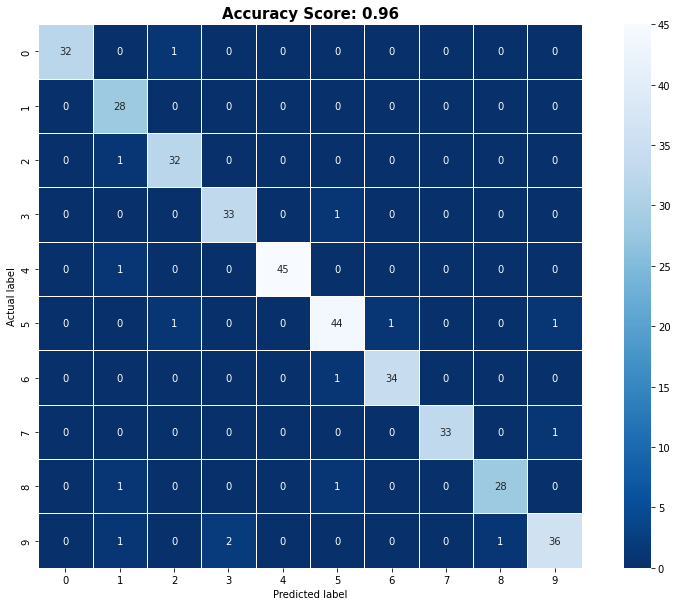

In [17]:
# Plot the confusion matrix for the model
cm = confusion_matrix(dataset_y_test, dataset_y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label");
plt.xlabel("Predicted label");
all_sample_title = "Accuracy Score: {:.2f}".format(regr.score(dataset_X_test, dataset_y_test))
plt.title(all_sample_title, size = 15, fontweight="bold")
plt.show()